<a href="https://colab.research.google.com/github/manlikeolihi/deep-learning-medical-imaging/blob/main/Trainingmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nibabel matplotlib scipy



In [3]:
from google.colab import files
uploaded = files.upload()


Saving pancreas_012.nii.gz to pancreas_012.nii.gz


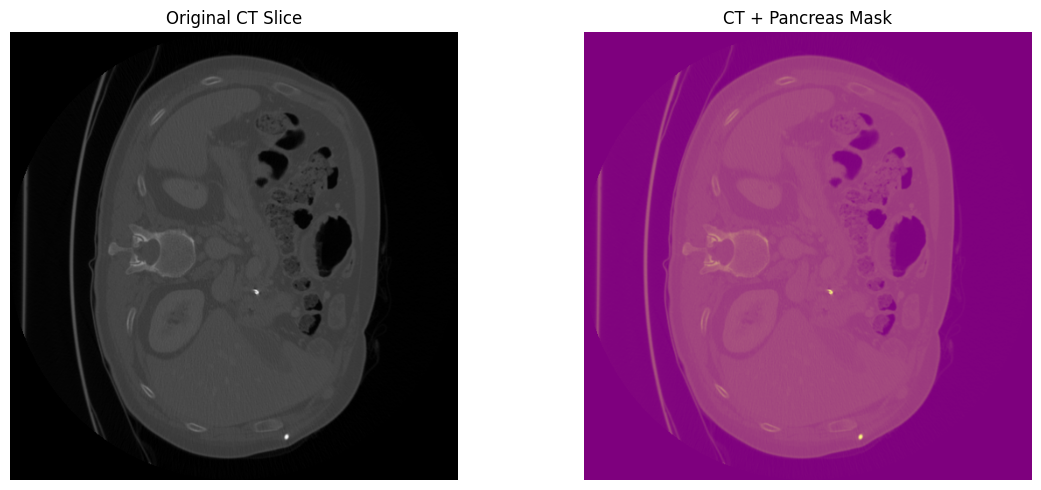

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load CT scan and label
ct = nib.load("pancreas_012.nii.gz").get_fdata()
mask = nib.load("pancreas_012.nii.gz").get_fdata()  # This is the segmentation file

# Find the middle slice that contains the pancreas (label = 1)
pancreas_slices = np.unique(np.where(mask == 1)[2])
mid_slice = pancreas_slices[len(pancreas_slices) // 2]

# Show CT and mask overlay
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ct[:, :, mid_slice], cmap='gray')
plt.title("Original CT Slice")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ct[:, :, mid_slice], cmap='gray')
plt.imshow(mask[:, :, mid_slice], alpha=0.5, cmap='spring')
plt.title("CT + Pancreas Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
from scipy.ndimage import gaussian_filter

# Copy the CT and mask so we don't overwrite
synthetic_ct = np.copy(ct)
synthetic_tumor_mask = np.zeros_like(mask)

# Randomly choose a point inside the pancreas
pancreas_voxels = np.argwhere(mask == 1)
center = pancreas_voxels[np.random.randint(len(pancreas_voxels))]

# Define size of the synthetic tumor (ellipsoid)
radius = [5, 5, 3]  # x, y, z dimensions

# Draw the synthetic tumor
for x in range(-radius[0], radius[0]):
    for y in range(-radius[1], radius[1]):
        for z in range(-radius[2], radius[2]):
            px, py, pz = center + np.array([x, y, z])
            if (0 <= px < mask.shape[0] and
                0 <= py < mask.shape[1] and
                0 <= pz < mask.shape[2]):
                if (x**2 / radius[0]**2 + y**2 / radius[1]**2 + z**2 / radius[2]**2) <= 1:
                    synthetic_tumor_mask[int(px), int(py), int(pz)] = 1
                    synthetic_ct[int(px), int(py), int(pz)] += 60  # simulate intensity change

# Smooth the result to make it look more natural
synthetic_ct = gaussian_filter(synthetic_ct, sigma=0.7)

print(" Synthetic tumor injected!")


 Synthetic tumor injected!


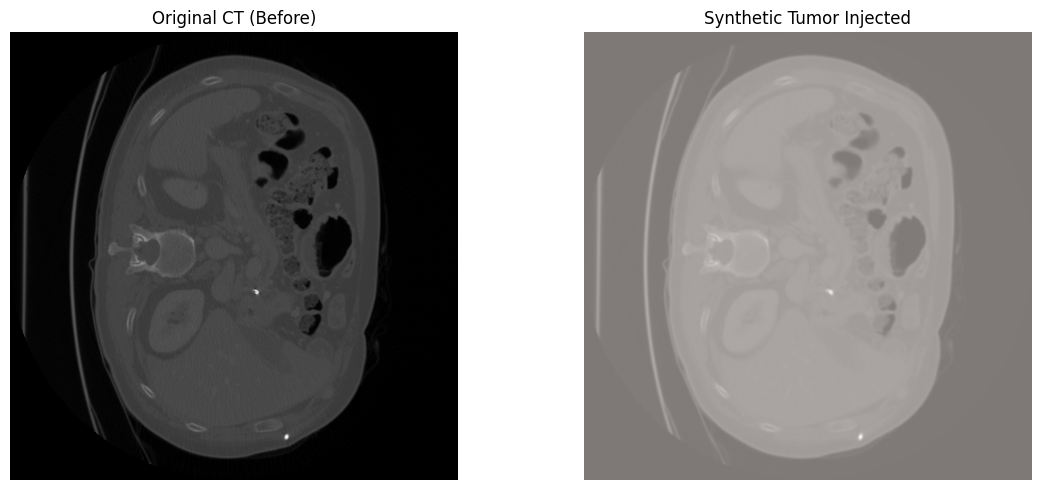

In [8]:
# Use the same slice index to see where we injected the tumor
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ct[:, :, mid_slice], cmap='gray')
plt.title("Original CT (Before)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(synthetic_ct[:, :, mid_slice], cmap='gray')
plt.imshow(synthetic_tumor_mask[:, :, mid_slice], alpha=0.5, cmap='Reds')
plt.title("Synthetic Tumor Injected")
plt.axis('off')

plt.tight_layout()
plt.show()


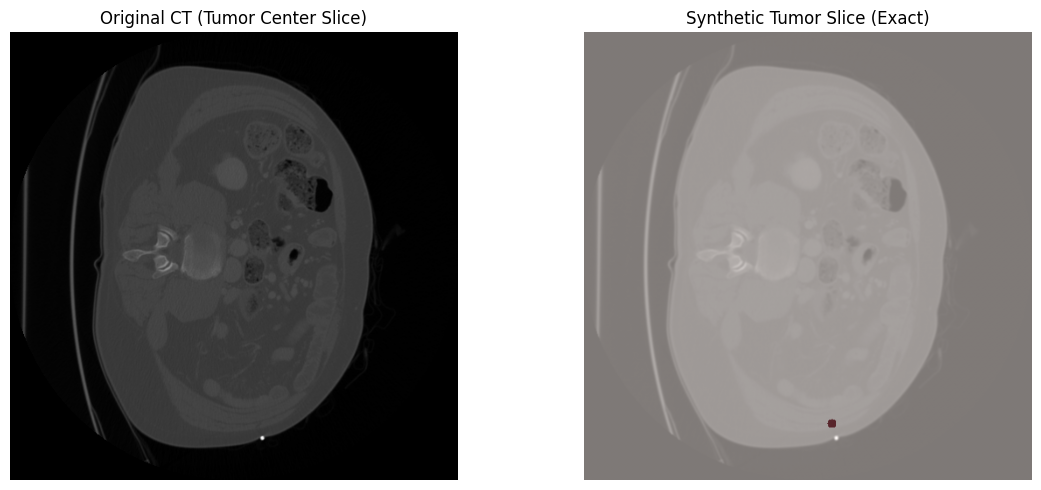

In [9]:
# Show the exact slice where the tumor was placed (center of the ellipsoid)
tumor_center_slice = int(center[2])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ct[:, :, tumor_center_slice], cmap='gray')
plt.title("Original CT (Tumor Center Slice)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(synthetic_ct[:, :, tumor_center_slice], cmap='gray')
plt.imshow(synthetic_tumor_mask[:, :, tumor_center_slice], alpha=0.5, cmap='Reds')
plt.title("Synthetic Tumor Slice (Exact)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Save synthetic CT scan and tumor mask as .nii.gz files
import nibabel as nib

# Use the same affine (image orientation info) as original
affine = nib.load("pancreas_012.nii.gz").affine

# Create NIfTI images
synthetic_ct_nii = nib.Nifti1Image(synthetic_ct, affine)
synthetic_mask_nii = nib.Nifti1Image(synthetic_tumor_mask, affine)

# Save to files
nib.save(synthetic_ct_nii, "synthetic_ct.nii.gz")
nib.save(synthetic_mask_nii, "synthetic_tumor_mask.nii.gz")

print("✅ Files saved as synthetic_ct.nii.gz and synthetic_tumor_mask.nii.gz")


✅ Files saved as synthetic_ct.nii.gz and synthetic_tumor_mask.nii.gz


In [11]:
from google.colab import files
files.download("synthetic_ct.nii.gz")
files.download("synthetic_tumor_mask.nii.gz")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>